In [ ]:
#@title Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
import tensorflow as tf
import seaborn as sns
import geopandas as gpd

#Getting Data

In [ ]:
#@title Project Variables
cgr_id = "1pCoE_FaZJGyt74oUcZsmWspzWEC2J3JR"

caaspp_id = "1PUMwhUvtrvrKbcLDNBxf30_lc_2Sox9B"

acgr_id = "1htmZUuATSYc2-EGT_iaX4rzgHETFOwFK"

ada_id = "1o5MWisfKcKJrKeqpUX6rwfOBKEyo4oKI"

url = "https://drive.google.com/uc?id="

# This variable decides whether to bound the data (remove the outliers)
bounded = True

In [ ]:
#@title Importing Data
cgr_df = pd.read_csv(url+cgr_id, header=0, encoding = 'latin1')
caaspp_df = pd.read_csv(url+caaspp_id, header=0, encoding = 'latin1')
acgr_df = pd.read_csv(url+acgr_id, header=0, encoding = 'latin1')
ada_df = pd.read_csv(url+ada_id, header=0, encoding = 'latin1')

#Data Processing

In [ ]:
cgr_df.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,AlternativeSchoolAccountabilityStatus,...,College Going Rate - Total (12 Months),Enrolled In-State (12 Months),Enrolled Out-of-State (12 Months),Not Enrolled In College (12 Months),Enrolled UC (12 Months),Enrolled CSU (12 Months),Enrolled CCC (12 Months),Enrolled In-State Private (2 and 4 Year) (12 Months),Enrolled Out-of-State 4-Year College (Public/Private) (12 Months),Enrolled Out-of-State 2-Year College (Public/Private) (12 Months)
0,2021-22,T,0,NaN,NaN,State,NaN,NaN,All,All,...,46.8,44192,2869,53436,899,2445,38764,2084,2274,595
1,2021-22,T,0,NaN,NaN,State,NaN,NaN,All,All,...,84.3,90269,14959,19612,19849,28282,35423,6715,14524,435
2,2021-22,T,0,NaN,NaN,State,NaN,NaN,All,All,...,51.4,436,15,427,6,4,420,6,7,8
3,2021-22,T,0,NaN,NaN,State,NaN,NaN,All,All,...,67.5,134897,17843,73475,20754,30731,74607,8805,16805,1038
4,2021-22,T,0,NaN,NaN,State,NaN,NaN,All,All,...,38.1,46042,3159,79958,703,1940,42088,1311,2325,834


In [ ]:
#@title Pre-Processing CGR Data

processed_cgr_df = cgr_df[
    (cgr_df['AggregateLevel'] == 'D')
    & (cgr_df['CharterSchool'] == "All")
    & (cgr_df['AlternativeSchoolAccountabilityStatus'] == "All")
    & (cgr_df['ReportingCategory'] == "TA")
    & (cgr_df['CompleterType'] == "TA")]

print(processed_cgr_df.shape)
processed_cgr_df.head()

(550, 24)


,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,AlternativeSchoolAccountabilityStatus,...,College Going Rate - Total (12 Months),Enrolled In-State (12 Months),Enrolled Out-of-State (12 Months),Not Enrolled In College (12 Months),Enrolled UC (12 Months),Enrolled CSU (12 Months),Enrolled CCC (12 Months),Enrolled In-State Private (2 and 4 Year) (12 Months),Enrolled Out-of-State 4-Year College (Public/Private) (12 Months),Enrolled Out-of-State 2-Year College (Public/Private) (12 Months)
82754,2021-22,D,1,10017.0,0.0,Alameda,Alameda County Office of Education,District Office,All,All,...,34.7,122,8,245,10,30,72,10,7,1
83049,2021-22,D,1,31617.0,0.0,Alameda,California School for the Deaf-Fremont (State ...,District Office,All,All,...,72.7,10,6,6,0,0,10,0,6,0
83193,2021-22,D,1,61119.0,0.0,Alameda,Alameda Unified,District Office,All,All,...,78.7,560,92,176,155,126,255,24,89,3
83581,2021-22,D,1,61127.0,0.0,Alameda,Albany City Unified,District Office,All,All,...,81.2,190,52,56,66,40,77,7,50,2
83819,2021-22,D,1,61143.0,0.0,Alameda,Berkeley Unified,District Office,All,All,...,72.7,435,176,229,144,90,171,30,173,3


In [ ]:
caaspp_df.head(100)

,County Code,District Code,School Code,Filler,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
0,0,0,0,NaN,2022,1,B,2969670,2965421,3,...,16.02,48.71,35.27,11.77,71.11,17.12,16.3,59.57,24.13,4
1,0,0,0,NaN,2022,1,B,2969670,2965421,4,...,16.1,53.92,29.98,11.69,71.27,17.04,15.03,65.37,19.6,4
2,0,0,0,NaN,2022,1,B,2969670,2965421,5,...,18.68,51.9,29.42,12.46,72.49,15.06,17.67,60.05,22.28,4
3,0,0,0,NaN,2022,1,B,2969670,2965421,6,...,15.79,50.89,33.32,15.03,69.89,15.08,17.67,64.46,17.87,4
4,0,0,0,NaN,2022,1,B,2969670,2965421,7,...,23.24,49.9,26.86,12.93,72.27,14.8,19.8,60.52,19.68,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,10017,125567,NaN,2022,1,B,188,185,13,...,15.14,40,44.86,9.73,49.19,41.08,0,0,0,9
96,1,10017,130401,NaN,2022,1,B,8,8,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
97,1,10017,130401,NaN,2022,1,B,8,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
98,1,10017,130401,NaN,2022,1,B,8,8,11,...,*,*,*,*,*,*,*,*,*,7


In [ ]:
#@title Pre-Processing CAASPP Data

processed_caaspp_df = caaspp_df[
    (caaspp_df['Grade'] == 13)
    & (caaspp_df['Type ID'] == 6)]

processed_caaspp_df = processed_caaspp_df.rename(columns={'District Code': 'DistrictCode',
                                    'County Code': 'CountyCode'})

print(processed_caaspp_df.shape)
processed_caaspp_df.head()

(2044, 33)


,CountyCode,DistrictCode,School Code,Filler,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
35,1,10017,0,NaN,2022,1,B,24,24,13,...,*,*,*,*,*,*,*,*,*,6
39,1,10017,0,NaN,2022,1,B,24,24,13,...,*,*,*,*,*,*,*,*,*,6
182,1,31609,0,NaN,2022,1,B,20,20,13,...,*,*,*,*,*,*,*,*,*,6
189,1,31609,0,NaN,2022,1,B,20,20,13,...,*,*,*,*,*,*,*,*,*,6
211,1,31617,0,NaN,2022,1,B,97,97,13,...,0,22.68,77.32,2.06,56.7,41.24,1.03,49.48,49.48,6


In [ ]:
acgr_df.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,51,0.6,5,0.1,16,0.2,465,5.4,220,2.6
1,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,106,1.2,1,0,25,0.3,758,8.3,313,3.4
2,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,0,0,0,0,0,0,2,12.5,2,12.5
3,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,37,0.8,1,0,4,0.1,106,2.3,48,1.1
4,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,24,1.5,0,0,10,0.6,156,9.8,73,4.6


In [ ]:
#@title Pre-Processing ACGR Data

processed_acgr_df = acgr_df[
    (acgr_df['AggregateLevel'] == 'D')
    & (acgr_df['CharterSchool'] == "All")
    & (acgr_df['DASS'] == "All")
    & (acgr_df['ReportingCategory'] == "TA")]

print(processed_acgr_df.shape)
processed_acgr_df.head()

(553, 34)


,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
8511,2021-22,D,1,10017.0,0.0,Alameda,Alameda County Office of Education,District Office,All,All,...,0,0,0,0,1,0.3,77,22.6,54,15.8
8644,2021-22,D,1,31609.0,0.0,Alameda,California School for the Blind (State Special...,District Office,All,All,...,*,*,*,*,*,*,*,*,*,*
8702,2021-22,D,1,31617.0,0.0,Alameda,California School for the Deaf-Fremont (State ...,District Office,All,All,...,0,0,0,0,0,0,1,3.4,14,48.3
8768,2021-22,D,1,61119.0,0.0,Alameda,Alameda Unified,District Office,All,All,...,9,1.1,1,0.1,2,0.2,16,1.9,21,2.5
8908,2021-22,D,1,61127.0,0.0,Alameda,Albany City Unified,District Office,All,All,...,2,0.6,0,0,0,0,20,6.3,3,0.9


In [ ]:
ada_df.head()

,CO,CDS,DISTRICT,EDP 365,Current\nExpense ADA,Current\nExpense Per ADA,LEA Type
0,1,61119,Alameda Unified,"135,123,065.08","8,176.23","16,526.33",Unified
1,1,61127,Albany City Unified,"53,553,887.60","3,387.86","15,807.59",Unified
2,1,61143,Berkeley Unified,"191,390,431.37","8,830.03","21,674.95",Unified
3,1,61150,Castro Valley Unified,"113,160,004.75","8,460.88","13,374.50",Unified
4,1,61168,Emery Unified,"14,833,820.43",562.74,"26,359.99",Unified


In [ ]:
#@title Pre-Processing ADA Expense Data
processed_ada_df = ada_df.rename(columns={'CO': 'CountyCode',
                                'CDS': 'DistrictCode',
                                'DISTRICT': 'DistrictName',
                                'Current\nExpense ADA' : 'Current Expense ADA',
                                'Current\nExpense Per ADA' : 'Current Expense Per ADA'})


processed_ada_df["EDP 365"] = processed_ada_df["EDP 365"].str.replace(",","").astype(float)
processed_ada_df["Current Expense ADA"] = processed_ada_df["Current Expense ADA"].str.replace(",","").astype(float)
processed_ada_df["Current Expense Per ADA"] = processed_ada_df["Current Expense Per ADA"].str.replace(",","").astype(float)
print(processed_ada_df.shape)
processed_ada_df.head()

(935, 7)


,CountyCode,DistrictCode,DistrictName,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
0,1,61119,Alameda Unified,1.351231e+08,8176.23,16526.33,Unified
1,1,61127,Albany City Unified,5.355389e+07,3387.86,15807.59,Unified
2,1,61143,Berkeley Unified,1.913904e+08,8830.03,21674.95,Unified
3,1,61150,Castro Valley Unified,1.131600e+08,8460.88,13374.50,Unified
4,1,61168,Emery Unified,1.483382e+07,562.74,26359.99,Unified


In [ ]:
#@title Merging All Datasets
merged_df = pd.merge(processed_ada_df, processed_acgr_df, on=['CountyCode', 'DistrictCode', 'DistrictName'])
merged_df = pd.merge(merged_df, processed_caaspp_df, on=['CountyCode', 'DistrictCode'])
merged_df = pd.merge(merged_df, processed_cgr_df, on=['CountyCode', 'DistrictCode',
                                                      'AcademicYear', 'AggregateLevel', 'DistrictName', 'SchoolCode',
                                                      'CountyName', 'SchoolName', 'CharterSchool',
                                                      'ReportingCategory'])
print(merged_df.shape)
merged_df.head()

(940, 83)


,CountyCode,DistrictCode,DistrictName,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,AcademicYear,AggregateLevel,SchoolCode,...,College Going Rate - Total (12 Months),Enrolled In-State (12 Months),Enrolled Out-of-State (12 Months),Not Enrolled In College (12 Months),Enrolled UC (12 Months),Enrolled CSU (12 Months),Enrolled CCC (12 Months),Enrolled In-State Private (2 and 4 Year) (12 Months),Enrolled Out-of-State 4-Year College (Public/Private) (12 Months),Enrolled Out-of-State 2-Year College (Public/Private) (12 Months)
0,1,61119,Alameda Unified,1.351231e+08,8176.23,16526.33,Unified,2021-22,D,0.0,...,78.7,560,92,176,155,126,255,24,89,3
1,1,61119,Alameda Unified,1.351231e+08,8176.23,16526.33,Unified,2021-22,D,0.0,...,78.7,560,92,176,155,126,255,24,89,3
2,1,61127,Albany City Unified,5.355389e+07,3387.86,15807.59,Unified,2021-22,D,0.0,...,81.2,190,52,56,66,40,77,7,50,2
3,1,61127,Albany City Unified,5.355389e+07,3387.86,15807.59,Unified,2021-22,D,0.0,...,81.2,190,52,56,66,40,77,7,50,2
4,1,61143,Berkeley Unified,1.913904e+08,8830.03,21674.95,Unified,2021-22,D,0.0,...,72.7,435,176,229,144,90,171,30,173,3


In [ ]:
#@title Removing Null Values (*)

# Removing all null columns
merged_df = merged_df.dropna(axis=1, how='all')

# Removing all null rows
for col in merged_df.columns:
  count = merged_df[col].value_counts().get('*')
  if (count and count > 0):
    merged_df[col] = merged_df[col].replace('*', np.nan)
    print(col)
    print(count)

merged_df = merged_df.dropna()

print(merged_df.shape)
merged_df.head()


CohortStudents
32
Regular HS Diploma Graduates (Count)
32
Regular HS Diploma Graduates (Rate)
32
Met UC/CSU Grad Req's (Count)
32
Met UC/CSU Grad Req's (Rate)
32
Seal of Biliteracy (Count)
32
Seal of Biliteracy (Rate)
32
Golden State Seal Merit Diploma (Count)
32
Golden State Seal Merit Diploma (Rate
32
CHSPE Completer (Count)
32
CHSPE Completer (Rate)
32
Adult Ed. HS Diploma (Count)
32
Adult Ed. HS Diploma (Rate)
32
SPED Certificate (Count)
32
SPED Certificate (Rate)
32
GED Completer (Count)
32
GED Completer (Rate)
32
Other Transfer (Count)
32
Other Transfer (Rate)
32
Dropout (Count)
32
Dropout (Rate)
32
Still Enrolled (Count)
32
Still Enrolled (Rate)
32
Total Tested at Reporting Level
1
Total Tested with Scores at Reporting Level
1
Students Tested
1
Percentage Standard Exceeded
2
Percentage Standard Met
2
Percentage Standard Met and Above
2
Percentage Standard Nearly Met
2
Percentage Standard Not Met
2
Students with Scores
1
Area 1 Percentage Above Standard
14
Area 1 Percentage Near 

,CountyCode,DistrictCode,DistrictName,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,AcademicYear,AggregateLevel,SchoolCode,...,College Going Rate - Total (12 Months),Enrolled In-State (12 Months),Enrolled Out-of-State (12 Months),Not Enrolled In College (12 Months),Enrolled UC (12 Months),Enrolled CSU (12 Months),Enrolled CCC (12 Months),Enrolled In-State Private (2 and 4 Year) (12 Months),Enrolled Out-of-State 4-Year College (Public/Private) (12 Months),Enrolled Out-of-State 2-Year College (Public/Private) (12 Months)
0,1,61119,Alameda Unified,1.351231e+08,8176.23,16526.33,Unified,2021-22,D,0.0,...,78.7,560,92,176,155,126,255,24,89,3
1,1,61119,Alameda Unified,1.351231e+08,8176.23,16526.33,Unified,2021-22,D,0.0,...,78.7,560,92,176,155,126,255,24,89,3
2,1,61127,Albany City Unified,5.355389e+07,3387.86,15807.59,Unified,2021-22,D,0.0,...,81.2,190,52,56,66,40,77,7,50,2
3,1,61127,Albany City Unified,5.355389e+07,3387.86,15807.59,Unified,2021-22,D,0.0,...,81.2,190,52,56,66,40,77,7,50,2
4,1,61143,Berkeley Unified,1.913904e+08,8830.03,21674.95,Unified,2021-22,D,0.0,...,72.7,435,176,229,144,90,171,30,173,3


In [ ]:
#@title Keeping Relevant Columns
keep = [
    'Regular HS Diploma Graduates (Rate)',
    "Met UC/CSU Grad Req's (Rate)",
    'Golden State Seal Merit Diploma (Rate',
    'Dropout (Rate)',
    'Percentage Standard Exceeded',
    'Percentage Standard Met',
    'Percentage Standard Nearly Met',
    'Percentage Standard Not Met',
    'Area 1 Percentage Above Standard',
    'Area 1 Percentage Near Standard',
    'Area 1 Percentage Below Standard',
    'Area 2 Percentage Above Standard',
    'Area 2 Percentage Near Standard',
    'Area 2 Percentage Below Standard',
    'Area 3 Percentage Above Standard',
    'Area 3 Percentage Near Standard',
    'Area 3 Percentage Below Standard',
    'College Going Rate - Total (12 Months)'
    ]

df = merged_df[keep + ['Current Expense Per ADA']]

In [ ]:
#@title Casting Correct Column Datatypes
for col in df.columns:
  df[col] = df[col].astype(float)

df.dtypes

/tmp/ipython-input-3658567484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/tmp/ipython-input-3658567484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/tmp/ipython-input-3658567484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,0
Regular HS Diploma Graduates (Rate),float64
Met UC/CSU Grad Req's (Rate),float64
Golden State Seal Merit Diploma (Rate,float64
Dropout (Rate),float64
Percentage Standard Exceeded,float64
Percentage Standard Met,float64
Percentage Standard Nearly Met,float64
Percentage Standard Not Met,float64
Area 1 Percentage Above Standard,float64
Area 1 Percentage Near Standard,float64


In [ ]:
#@title Choosing Correlated Columns
n_cols = 10


corr_df = df.corr()
expense_ada = corr_df['Current Expense Per ADA']

corr_vals = expense_ada.abs().sort_values(ascending=False)
corr_cols = corr_vals.index[1:n_cols+1]
corr_df

,Regular HS Diploma Graduates (Rate),Met UC/CSU Grad Req's (Rate),Golden State Seal Merit Diploma (Rate,Dropout (Rate),Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,College Going Rate - Total (12 Months),Current Expense Per ADA
Regular HS Diploma Graduates (Rate),1.000000,0.412116,0.261005,-0.882363,0.278227,0.251251,-0.077572,-0.306903,0.291635,0.065745,-0.255094,0.288507,0.186997,-0.349401,0.271976,0.065738,-0.266221,0.491386,-0.155386
Met UC/CSU Grad Req's (Rate),0.412116,1.000000,0.559851,-0.391865,0.663507,0.353511,-0.453885,-0.542202,0.660546,-0.041226,-0.460871,0.659078,0.023240,-0.604849,0.634626,-0.074694,-0.455852,0.774909,-0.154439
Golden State Seal Merit Diploma (Rate,0.261005,0.559851,1.000000,-0.287546,0.534915,0.264069,-0.368436,-0.426824,0.530205,-0.042582,-0.364083,0.527453,0.008063,-0.479020,0.508659,-0.060392,-0.365006,0.499202,-0.126826
Dropout (Rate),-0.882363,-0.391865,-0.287546,1.000000,-0.283242,-0.242486,0.083205,0.305133,-0.298296,-0.059768,0.256323,-0.290127,-0.175482,0.345356,-0.272298,-0.059978,0.262324,-0.484841,0.162722
Percentage Standard Exceeded,0.278227,0.663507,0.534915,-0.283242,1.000000,0.638922,-0.638728,-0.878715,0.980508,0.140933,-0.808387,0.984522,-0.050682,-0.862648,0.919232,0.056549,-0.779716,0.655076,-0.124364
Percentage Standard Met,0.251251,0.353511,0.264069,-0.242486,0.638922,1.000000,-0.198513,-0.892247,0.613573,0.756819,-0.916933,0.648885,0.340591,-0.747533,0.507934,0.676707,-0.898781,0.375120,-0.172716
Percentage Standard Nearly Met,-0.077572,-0.453885,-0.368436,0.083205,-0.638728,-0.198513,1.000000,0.295008,-0.587101,0.231736,0.289692,-0.630527,0.447551,0.353821,-0.500746,0.153061,0.291460,-0.425273,0.009074
Percentage Standard Not Met,-0.306903,-0.542202,-0.426824,0.305133,-0.878715,-0.892247,0.295008,1.000000,-0.866977,-0.521225,0.958618,-0.873701,-0.245471,0.904542,-0.796341,-0.396929,0.927720,-0.553802,0.172190
Area 1 Percentage Above Standard,0.291635,0.660546,0.530205,-0.298296,0.980508,0.613573,-0.587101,-0.866977,1.000000,0.088609,-0.790565,0.964662,-0.020984,-0.858972,0.954186,-0.006611,-0.762013,0.655446,-0.134904
Area 1 Percentage Near Standard,0.065745,-0.041226,-0.042582,-0.059768,0.140933,0.756819,0.231736,-0.521225,0.088609,1.000000,-0.680021,0.130733,0.308877,-0.265575,0.016787,0.893860,-0.661516,-0.021177,-0.081822


In [ ]:
#@title Creating X and y Dataframes
y = df['Current Expense Per ADA']
X = df[corr_cols]

In [ ]:
#@title Creating Data Bound to Remove Outliers
upper_bound = (y < 60000) if bounded else (y > 0)

y = y[upper_bound]
X = X[upper_bound]

In [ ]:
#@title Train-Test Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#@title Scaling Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Visualization

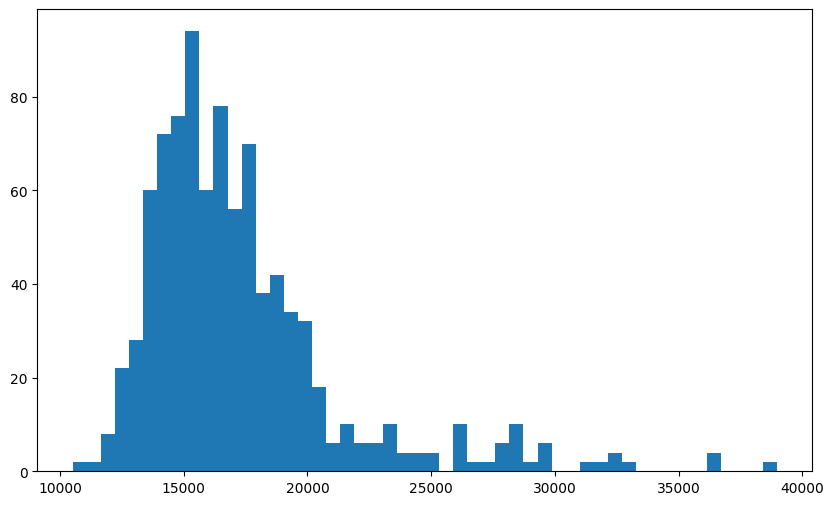

In [ ]:
#@title Funding Distribution Visualization
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50)
plt.show()

In [ ]:
merged_df[['Current Expense Per ADA', 'DistrictName']]

,Current Expense Per ADA,DistrictName
0,16526.33,Alameda Unified
1,16526.33,Alameda Unified
2,15807.59,Albany City Unified
3,15807.59,Albany City Unified
4,21674.95,Berkeley Unified
...,...,...
933,15017.71,Woodland Joint Unified
936,15695.34,Marysville Joint Unified
937,15695.34,Marysville Joint Unified
938,15135.44,Wheatland Union High


In [ ]:
#@title Funding Map Visualization
county_df = merged_df[['Current Expense Per ADA', 'DistrictName']].sort_values(by='DistrictName')
county_df = county_df.rename(columns={'DistrictName': 'NAME', 'Current Expense Per ADA': 'value'})

# Cut Outliers for Meaningful Heatmap Values
county_df = county_df[county_df['value'] < 50000]

In [ ]:
# Unified School Districts
unsd_url = "https://www2.census.gov/geo/tiger/TIGER2025/UNSD/tl_2025_06_unsd.zip"
unsd = gpd.read_file(unsd_url)

# Elementry School Districts
elsd_url = "https://www2.census.gov/geo/tiger/TIGER2025/ELSD/tl_2025_06_elsd.zip"
elsd = gpd.read_file(elsd_url)

unsd["NAME_norm"] = unsd["NAME"].map(lambda x : x[:-16]).str.strip().str.lower()
elsd["NAME_norm"] = elsd["NAME"].map(lambda x : x[:-16]).str.strip().str.lower()
county_df["NAME_norm"] = county_df["NAME"].str.strip().str.lower()

districts = pd.concat([unsd, elsd], ignore_index=True)

districts2 = districts.merge(county_df[["NAME_norm","value"]], on="NAME_norm", how="left")

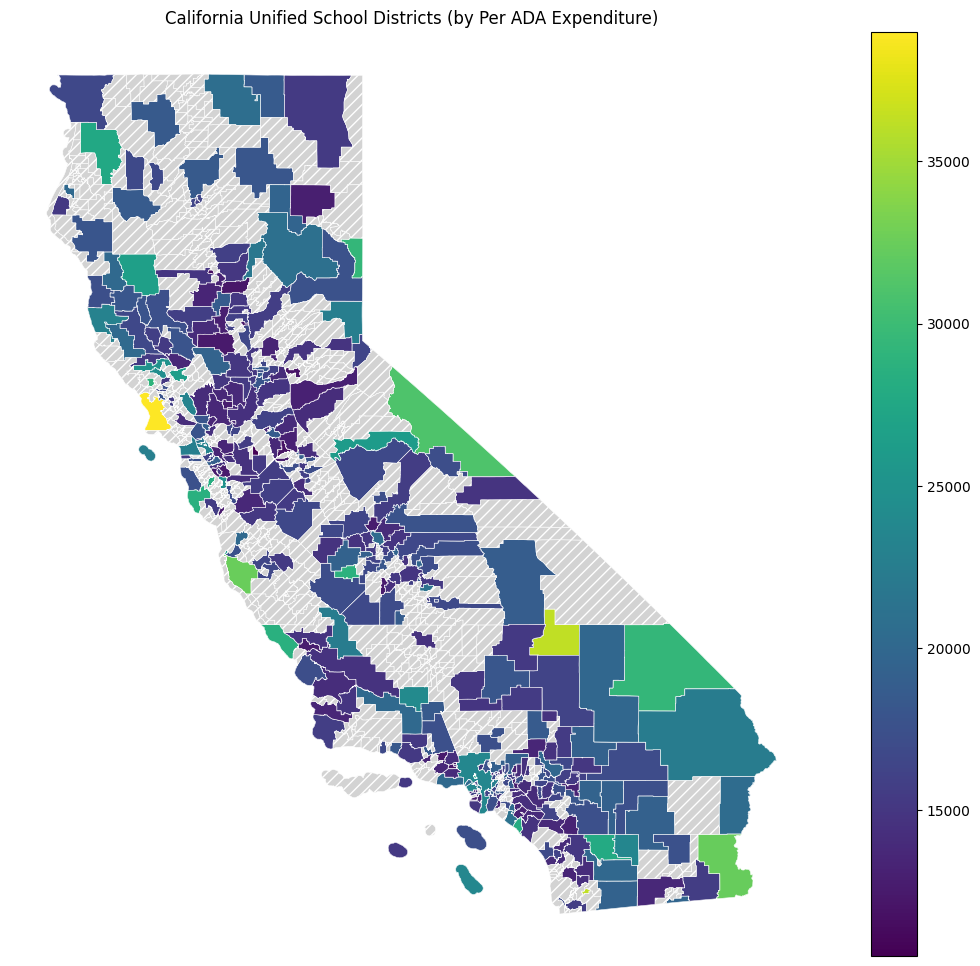

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))

districts2.plot(
    column="value",
    ax=ax,
    legend=True,
    edgecolor="white",
    linewidth=0.4,
    missing_kwds={
        "color": "lightgray",
        "edgecolor": "white",
        "hatch": "///",
        "label": "Missing",
    }
)

ax.set_title("California Unified School Districts (by Per ADA Expenditure)")
ax.axis("off")
plt.show()

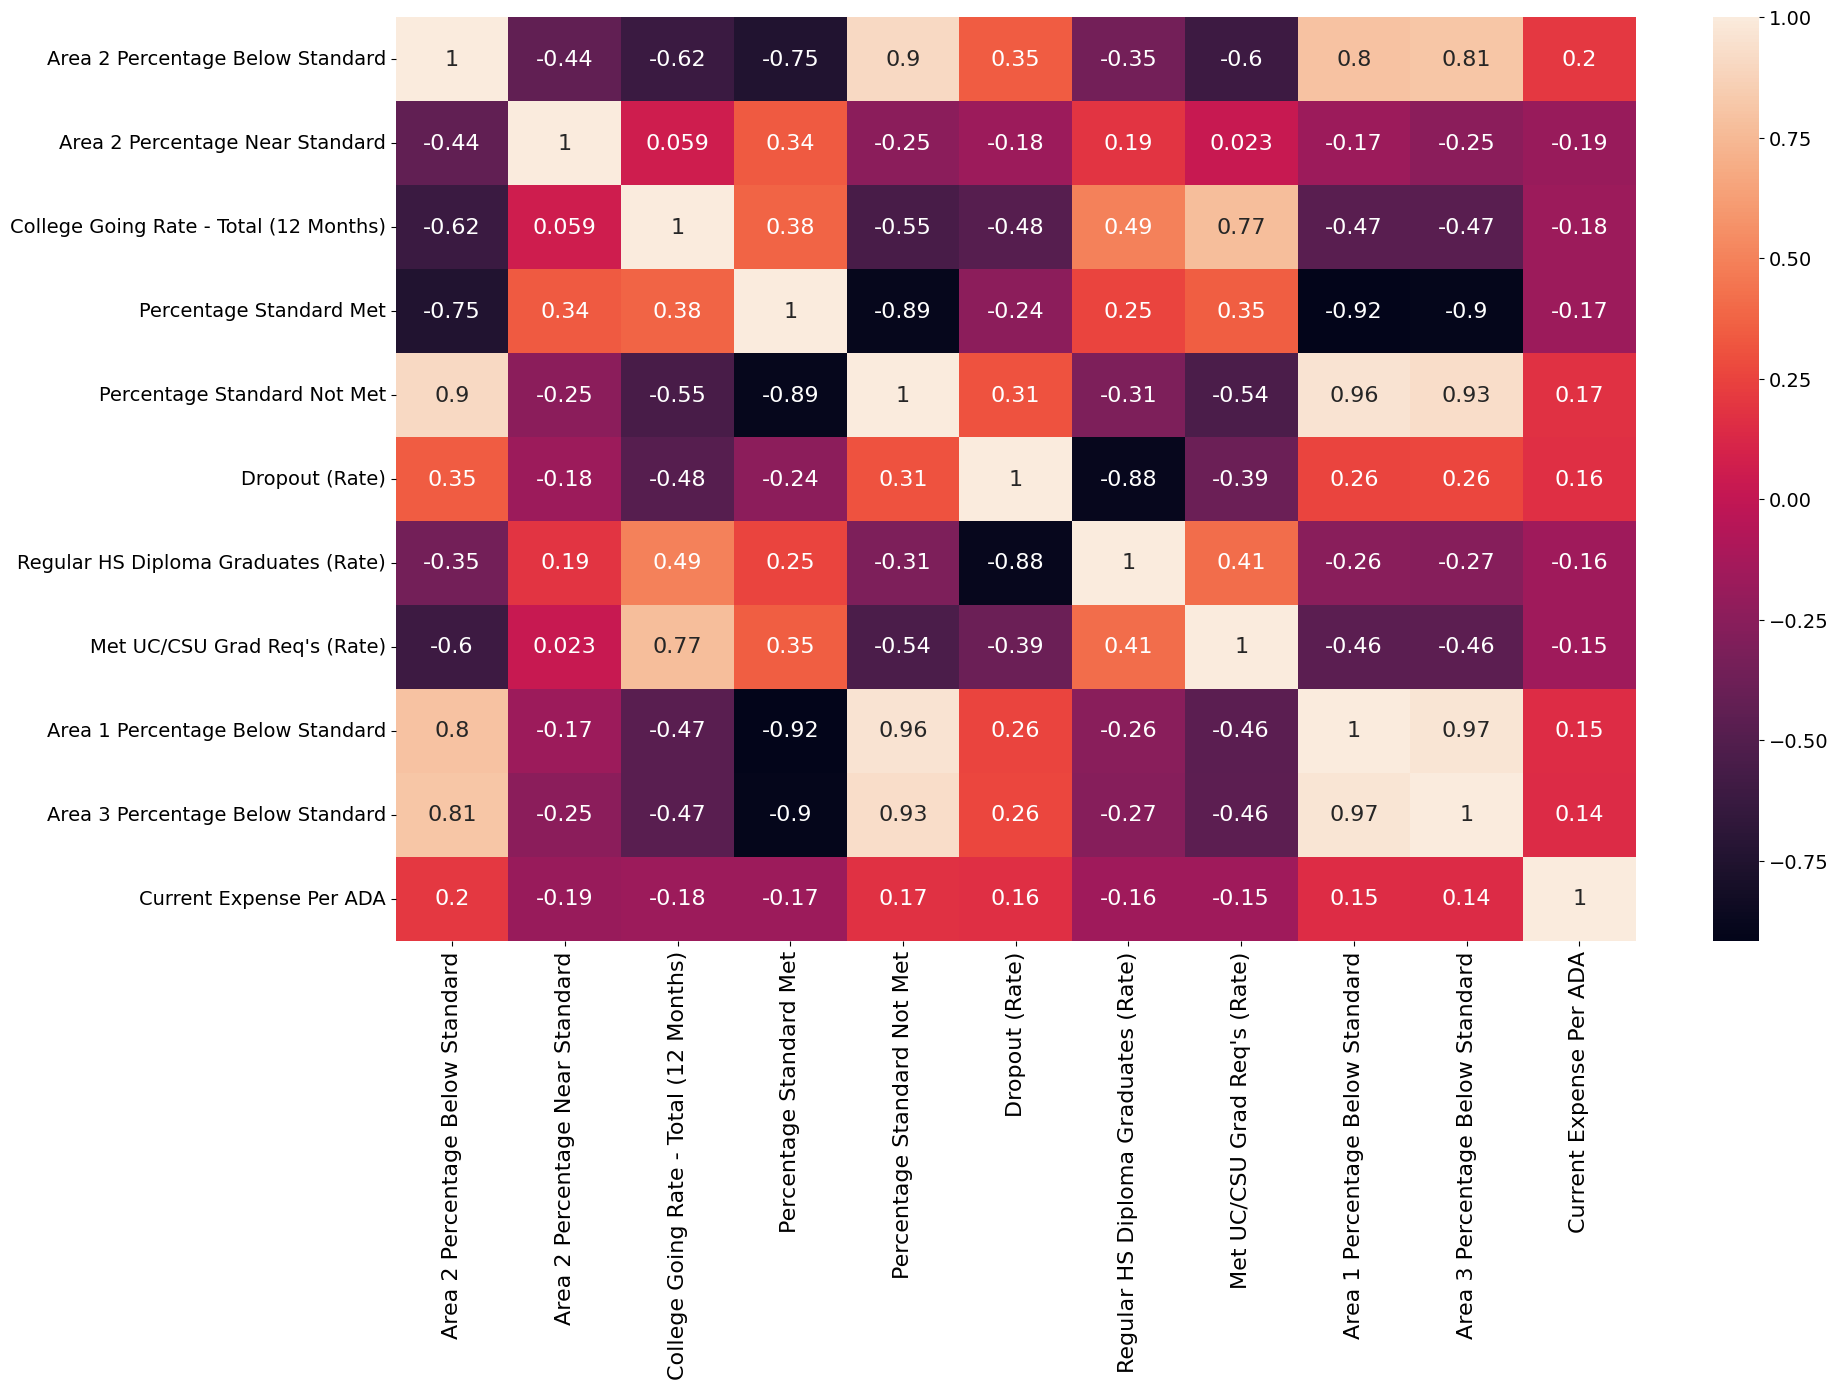

In [ ]:
#@title Correlation Visualization
plt.figure(figsize=(20, 12))
corr_vis_df = df[corr_cols.append(pd.Index(['Current Expense Per ADA']))].corr()


ax = sns.heatmap(corr_vis_df, annot=True, annot_kws={"size": 16})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

# Color bar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

plt.show()

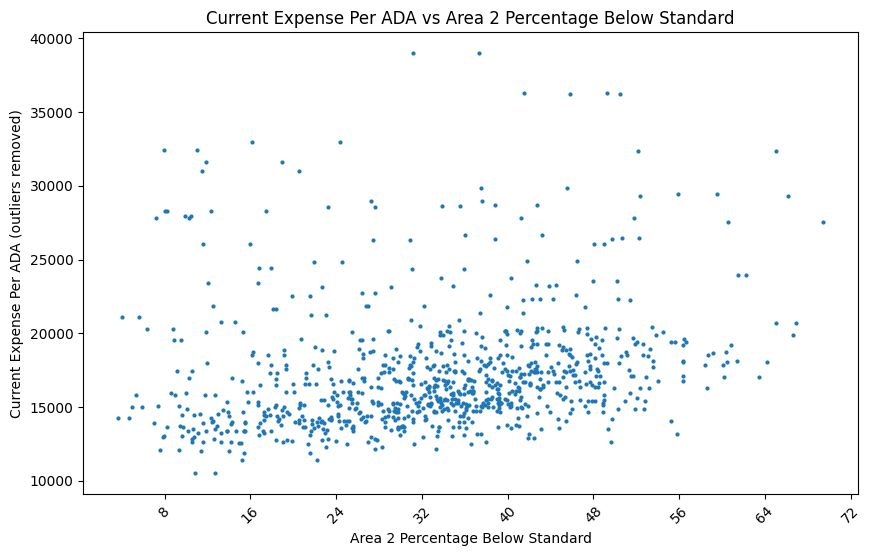

0.2023821471702703


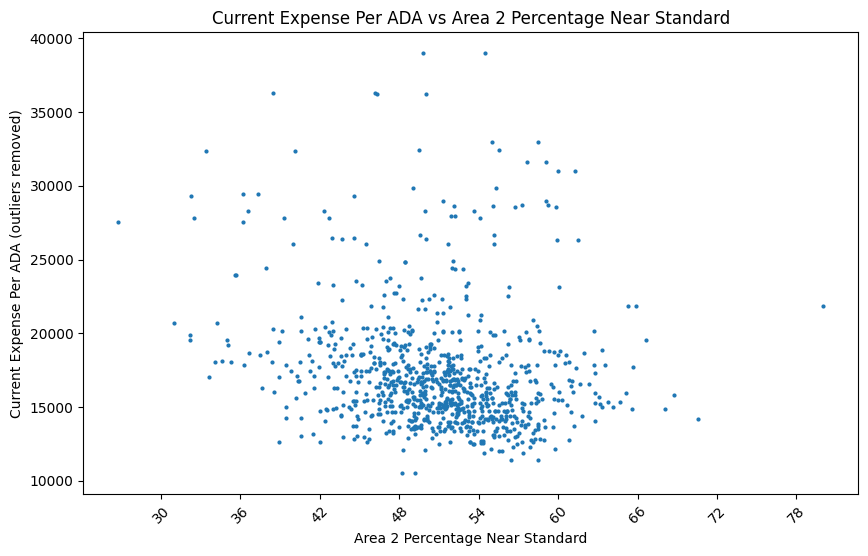

-0.19036419242208993


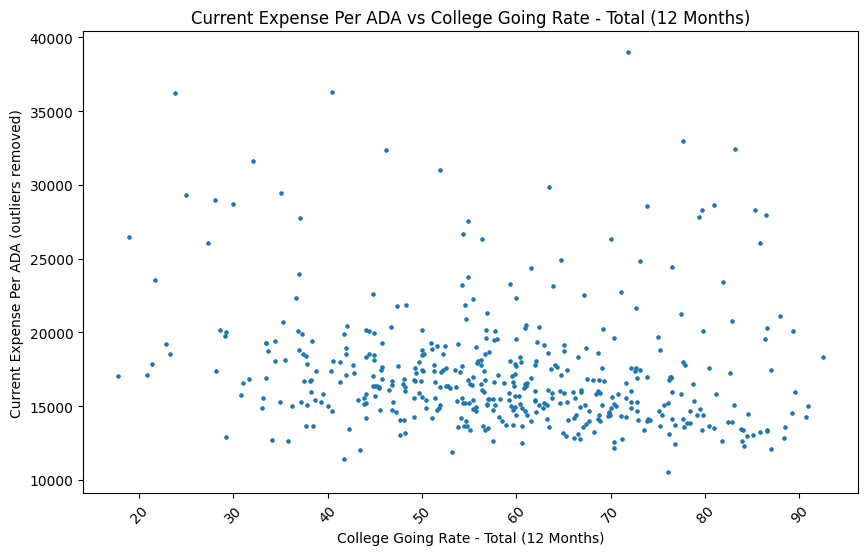

-0.17545854010455067


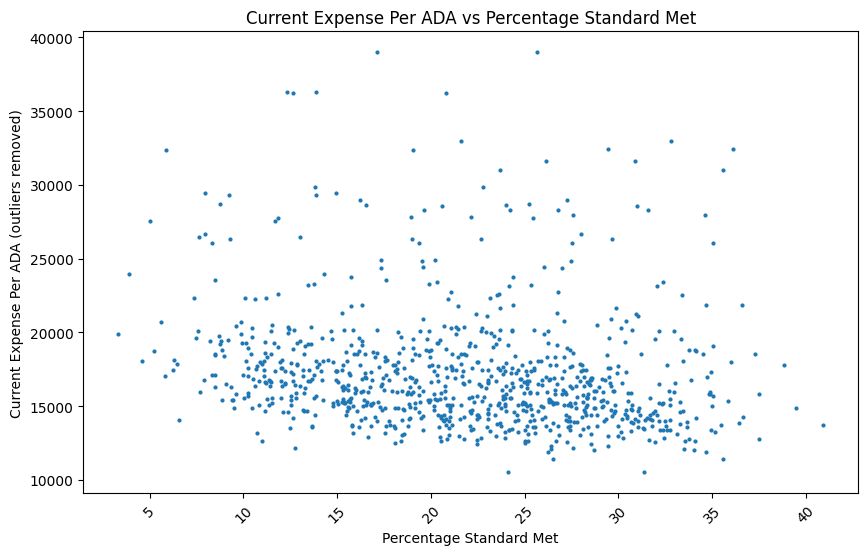

-0.17271558533099732


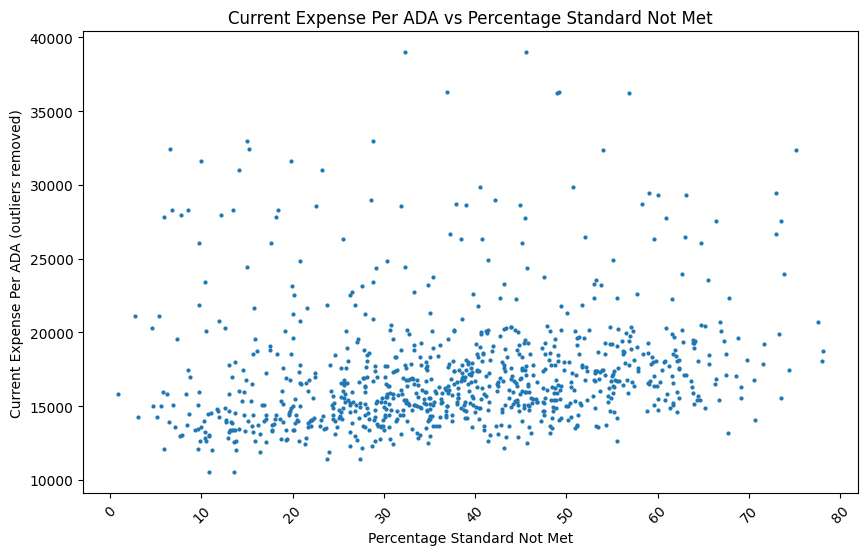

0.17219024442817546


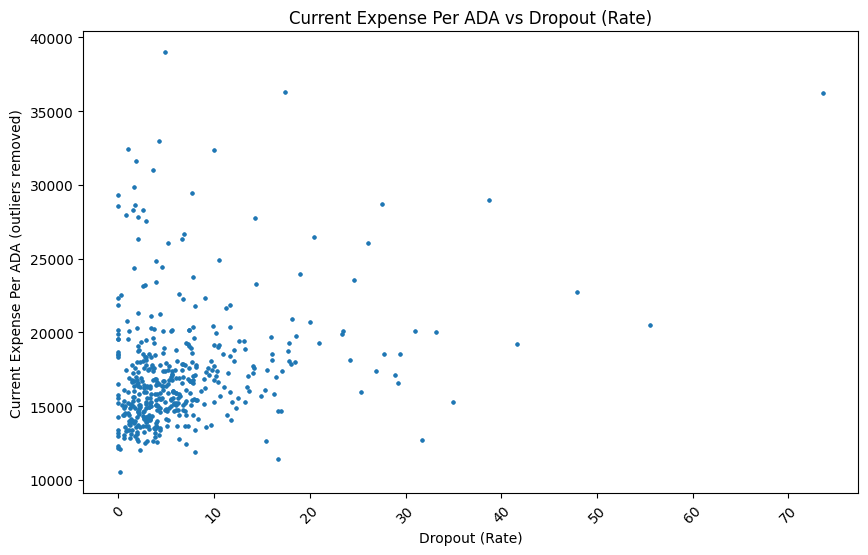

0.16272179051507873


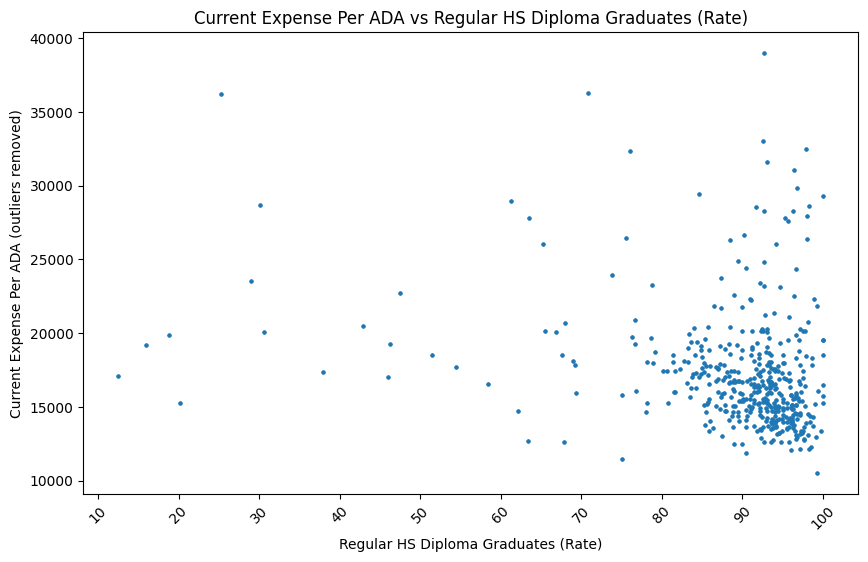

-0.15538587212048213


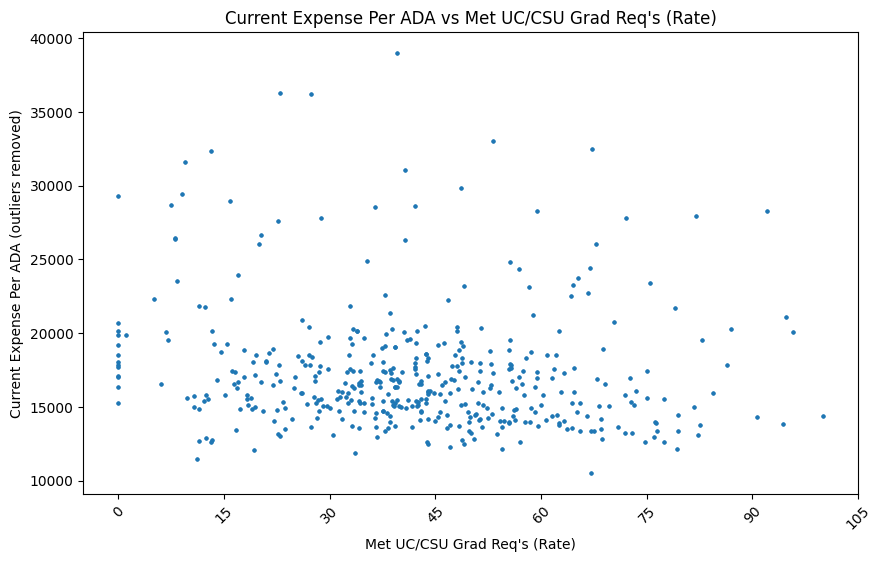

-0.15443882518929805


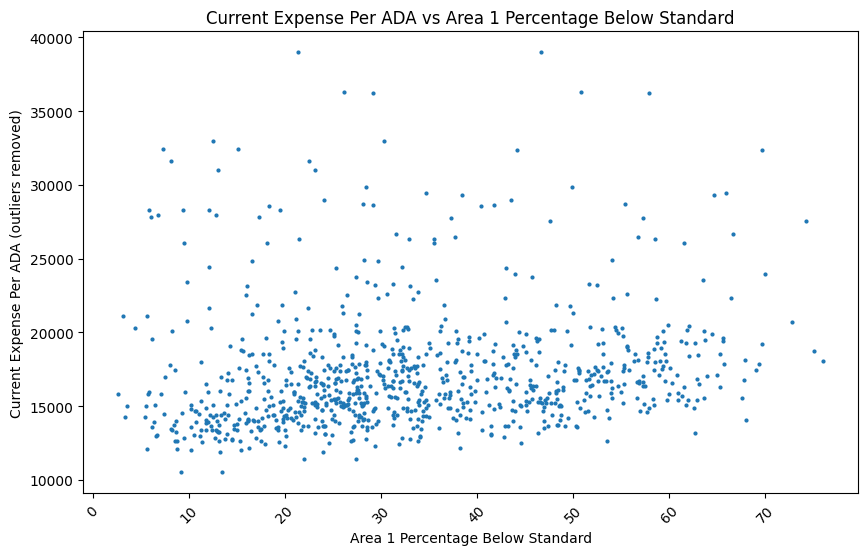

0.1496021541473289


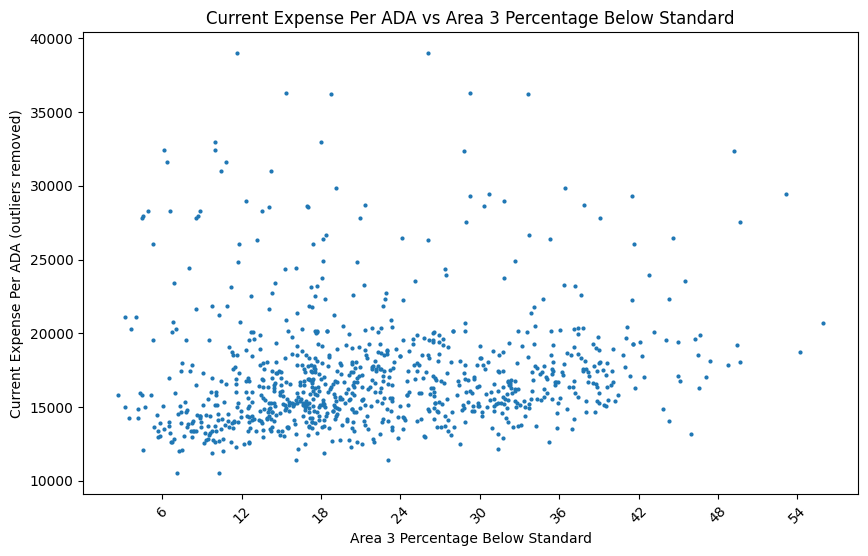

0.1435218103499538


In [ ]:
#@title Data Visualization of Features Against ADA
import matplotlib.ticker as ticker

for col in X.columns:
  plt.figure(figsize=(10, 6))

  # Apply bounds to X col and y data
  x_vals = X[col]
  x_vals = x_vals[upper_bound]

  plt.scatter(x_vals, y, s=4)
  plt.title(f"Current Expense Per ADA vs {col}")
  plt.xlabel(col)
  plt.ylabel('Current Expense Per ADA (outliers removed)')
  plt.xticks(rotation=45)

  ax = plt.gca()
  ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

  plt.show()
  print(expense_ada[col])

#Baseline Models

In [ ]:
#@title Automatic Model Running and Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

def run_model(model, X_train, y_train, X_test, y_test):

  # Training
  model.fit(X_train, y_train)

  # Prediction
  y_pred = model.predict(X_test)

  # Evaluation
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = root_mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"Mean Absolute Error: {mae:,.2f}")
  print(f"Mean Squared Error: {mse:,.2f}")
  print(f"Root Mean Squared Error: {rmse:,.2f}")
  print(f"R2 Score: {r2:,.2f}")

In [ ]:
#@title Linear Regression
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
run_model(linear_regressor, X_train, y_train, X_test, y_test)

# Inspect the coefficients to understand which features drive expenditure
print(X.columns)
print("Coefficients:", linear_regressor.coef_)
print("Intercept:", linear_regressor.intercept_)

Mean Absolute Error: 2,590.82
Mean Squared Error: 12,917,960.38
Root Mean Squared Error: 3,594.16
R2 Score: 0.11
Index(['Area 2 Percentage Below Standard', 'Area 2 Percentage Near Standard',
       'College Going Rate - Total (12 Months)', 'Percentage Standard Met',
       'Percentage Standard Not Met', 'Dropout (Rate)',
       'Regular HS Diploma Graduates (Rate)', 'Met UC/CSU Grad Req's (Rate)',
       'Area 1 Percentage Below Standard', 'Area 3 Percentage Below Standard'],
      dtype='object')
Coefficients: [ 130.78448383  -55.57705727   -6.10332479  -73.7435761  -135.20052228
  136.28301372    5.1729175     8.36374516  208.31371861 -268.11334986]
Intercept: 20197.706114560184


In [ ]:
#@title Regularized Baseline Models
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso()
ridge_model = Ridge()

print("Lasso:")
run_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)
print("Ridge:")
run_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

Lasso:
Mean Absolute Error: 2,591.53
Mean Squared Error: 12,925,662.52
Root Mean Squared Error: 3,595.23
R2 Score: 0.11
Ridge:
Mean Absolute Error: 2,593.30
Mean Squared Error: 12,945,289.30
Root Mean Squared Error: 3,597.96
R2 Score: 0.11


In [ ]:
#@title Tree Baseline Models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor

decision_tree_model = DecisionTreeRegressor(random_state=1)
random_forest_model = RandomForestRegressor(random_state=1)

num_trees = 5

trees = [(f"rf{i}", RandomForestRegressor(random_state=1+i)) for i in range(num_trees)]
print(trees)

voting_model = VotingRegressor(estimators=trees)
stacking_model = StackingRegressor(estimators=trees)

print("Decision Tree:")
run_model(decision_tree_model, X_train_scaled, y_train, X_test_scaled, y_test)
print("Random Forest:")
run_model(random_forest_model, X_train_scaled, y_train, X_test_scaled, y_test)
print("Voting Regressor:")
run_model(voting_model, X_train_scaled, y_train, X_test_scaled, y_test)
print("Stacking Regressor:")
run_model(stacking_model, X_train_scaled, y_train, X_test_scaled, y_test)

[('rf0', RandomForestRegressor(random_state=1)), ('rf1', RandomForestRegressor(random_state=2)), ('rf2', RandomForestRegressor(random_state=3)), ('rf3', RandomForestRegressor(random_state=4)), ('rf4', RandomForestRegressor(random_state=5))]
Decision Tree:
Mean Absolute Error: 2,271.76
Mean Squared Error: 17,140,881.53
Root Mean Squared Error: 4,140.15
R2 Score: -0.18
Random Forest:
Mean Absolute Error: 2,109.08
Mean Squared Error: 8,553,281.74
Root Mean Squared Error: 2,924.60
R2 Score: 0.41
Voting Regressor:
Mean Absolute Error: 2,105.81
Mean Squared Error: 8,455,383.28
Root Mean Squared Error: 2,907.81
R2 Score: 0.42
Stacking Regressor:
Mean Absolute Error: 2,119.09
Mean Squared Error: 8,637,512.78
Root Mean Squared Error: 2,938.96
R2 Score: 0.40


In [ ]:
#@title Penalized Spline Models

from sklearn.preprocessing import SplineTransformer

spline = SplineTransformer(n_knots=5, degree=3, knots="quantile", extrapolation="continue", include_bias=False)

X_spline_train = spline.fit_transform(X_train_scaled)
X_spline_test = spline.transform(X_test_scaled)

lasso_spline = Lasso()
ridge_spline = Ridge()

print("Lasso:")
run_model(lasso_spline, X_spline_train, y_train, X_spline_test, y_test)
print("Ridge:")
run_model(ridge_spline, X_spline_train, y_train, X_spline_test, y_test)


Lasso:
Mean Absolute Error: 2,643.81
Mean Squared Error: 12,697,570.87
Root Mean Squared Error: 3,563.37
R2 Score: 0.12
Ridge:
Mean Absolute Error: 2,579.14
Mean Squared Error: 12,620,887.23
Root Mean Squared Error: 3,552.59
R2 Score: 0.13


#Custom Neural Network

In [ ]:
#@title Custom NN Packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer
from tensorflow.keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from tensorflow.keras import optimizers

In [ ]:
#@title Running Different NN Architectures

architectures = [(128,64,64), (256, 128, 128), (128, 64, 64, 64), (256,128,64,64,64)]
model_results = []

for a in architectures:
  model = Sequential()
  model.add(InputLayer(shape=(X.shape[1],)))
  for i in a:
    model.add(Dense(i, activation='relu'))
  model.add(Dense(1, activation='linear'))
  optimizer = optimizers.SGD(learning_rate=1e-8, momentum=0.9)
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
  model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=100)
  y_pred = model.predict(X_test_scaled)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = root_mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  model_results.append((a, mae, rmse, r2))

for a, mae, rmse, r2 in model_results:
  print(f"Architecture: {a}")
  print(f"Mean Absolute Error: {mae:,.2f}")
  print(f"Root Mean Squared Error: {rmse:,.2f}")
  print(f"R2 Score: {r2:,.2f}")

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 316705696.0000 - mean_absolute_error: 17275.0977 - val_loss: 304187072.0000 - val_mean_absolute_error: 17021.0957
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 314435072.0000 - mean_absolute_error: 17255.2109 - val_loss: 304177344.0000 - val_mean_absolute_error: 17020.8145
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 327958176.0000 - mean_absolute_error: 17594.9492 - val_loss: 304164896.0000 - val_mean_absolute_error: 17020.4570
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 316737568.0000 - mean_absolute_error: 17287.9746 - val_loss: 304148384.0000 - val_mean_absolute_error: 17019.9805
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 319817856.0000 - mean_absolute_error: 17393.2773 - val_loss: 304122848.0000 - val_mean_absolute_error: 17019.2461
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 311756896.0000 - mean_absolute_error: 17220.8379 - val_loss: 304080192.0000

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 317144640.0000 - mean_absolute_error: 17333.1191 - val_loss: 304183264.0000 - val_mean_absolute_error: 17020.9844
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 315999936.0000 - mean_absolute_error: 17307.7285 - val_loss: 304171712.0000 - val_mean_absolute_error: 17020.6523
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 320761344.0000 - mean_absolute_error: 17423.2090 - val_loss: 304154432.0000 - val_mean_absolute_error: 17020.1523
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 306076064.0000 - mean_absolute_error: 17079.8320 - val_loss: 304122304.0000 - val_mean_absolute_error: 17019.2207
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 322784992.0000 - mean_absolute_error: 17425.4902 - val_loss: 304039520.0000 - val_mean_absolute_error: 17016.8418
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 311926464.0000 - mean_absolute_error:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Architecture: (128, 64, 64)
Mean Absolute Error: 2,743.18
Root Mean Squared Error: 3,572.20
R2 Score: 0.12
Architecture: (256, 128, 128)
Mean Absolute Error: 2,870.83
Root Mean Squared Error: 3,742.99
R2 Score: 0.03
Architecture: (128, 64, 64, 64)
Mean Absolute Error: 3,855.50
Root Mean Squared Error: 4,535.58
R2 Score: -0.42
Architecture: (256, 128, 64, 64, 64)
Mean Absolute Error: 17,013.41
Root Mean Squared Error: 17,433.46
R2 Score: -20.00


# XGBoost Models

In [ ]:
#@title XGBoost Packages

import xgboost
from xgboost import XGBRegressor
import shap

In [ ]:
#@title L1 Reg XGBoost

xgb_l1 = XGBRegressor(
    n_estimators=2000, learning_rate=0.05, max_depth=3,
    subsample=0.8, colsample_bytree=0.8, reg_alpha=1.0, random_state=1
).fit(X_train, y_train)

print(f"R^2: {xgb_l1.score(X_test, y_test):.2f}")

explainer_l1 = shap.TreeExplainer(xgb_l1)
shap_values2 = explainer_l1.shap_values(X_test)

R^2: 0.37


In [ ]:
#@title L1 Reg XGBoost Eval

y_pred_l1 = xgb_l1.predict(X_test)
xgb_mse_l1 = mean_squared_error(y_test, y_pred_l1)
print(f"Mean Squared Error: {xgb_mse_l1:,.2f}")
xgb_mae_l1 = mean_absolute_error(y_test, y_pred_l1)
print(f"Mean Absolute Error: {xgb_mae_l1:,.2f}")
xgb_rmse_l1 = root_mean_squared_error(y_test, y_pred_l1)
print(f"Root Mean Squared Error: {xgb_rmse_l1:,.2f}")

Mean Squared Error: 9,166,462.85
Mean Absolute Error: 2,147.23
Root Mean Squared Error: 3,027.62


In [ ]:
#@title L2 Reg XGBoost

xgb_l2 = XGBRegressor(
    n_estimators=2000, learning_rate=0.05, max_depth=3,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0, random_state=1
).fit(X_train, y_train)

print(f"R^2: {xgb_l2.score(X_test, y_test):.2f}")

explainer = shap.TreeExplainer(xgb_l2)
shap_values = explainer.shap_values(X_test)

R^2: 0.39


In [ ]:
#@title L2 Reg XGBoost Eval

y_pred_l2 = xgb_l2.predict(X_test)
xgb_mse_l2 = mean_squared_error(y_test, y_pred_l2)
print(f"Mean Squared Error: {xgb_mse_l2:,.2f}")
xgb_mae_l2 = mean_absolute_error(y_test, y_pred_l2)
print(f"Mean Absolute Error: {xgb_mae_l2:,.2f}")
xgb_rmse_l2 = root_mean_squared_error(y_test, y_pred_l2)
print(f"Root Mean Squared Error: {xgb_rmse_l2:,.2f}")

Mean Squared Error: 8,795,040.23
Mean Absolute Error: 2,084.53
Root Mean Squared Error: 2,965.64


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

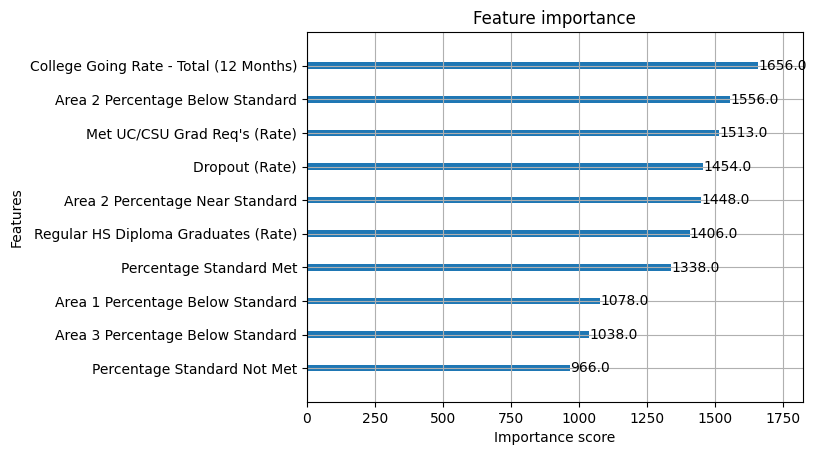

In [ ]:
#@title SHAP Feature Weight Chart

xgboost.plot_importance(xgb_l2)
# this plots based on weight of each feature - meaning the amount of times the feature is used to split the tree

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

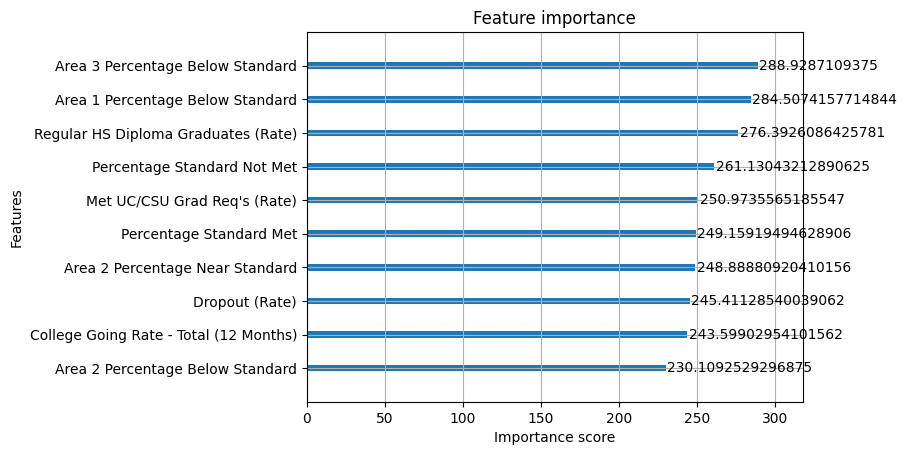

In [ ]:
#@title SHAP Feature Cover Chart

xgboost.plot_importance(xgb_l2, importance_type="cover")
# cover is the amount of splits weighted by the amount of times a training point goes through the split

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

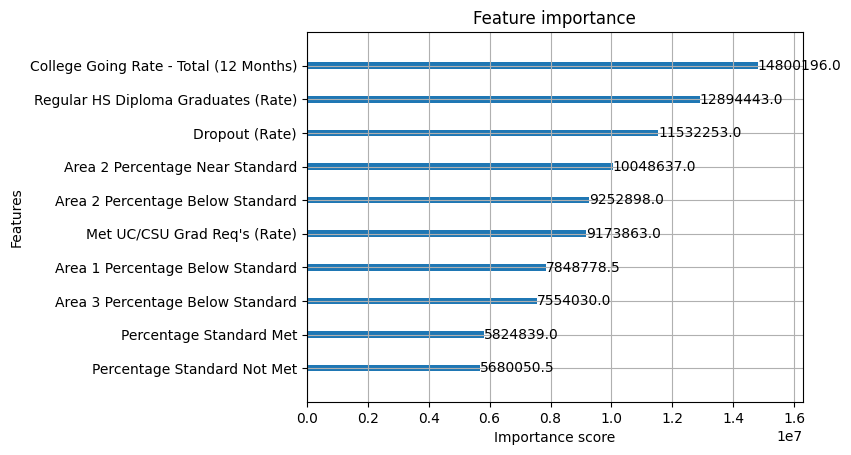

In [ ]:
#@title SHAP Feature Gain Chart

xgboost.plot_importance(xgb_l2, importance_type="gain")
# gain measures the avg training loss decrease when using a feature to split a tree

In [ ]:
#@title SHAP Force Plot

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])

In [ ]:
#@title Get Top 6 Weight Features from L1 SHAP Score

imps = xgb_l1.get_booster().get_score()
imps = sorted(imps.items(), key=lambda x: x[1], reverse=True)
weight_feature_keep = [pair[0] for pair in imps[:6]]

X_tr = X_train[weight_feature_keep]
X_te = X_test[weight_feature_keep]

weight_feature_keep

['College Going Rate - Total (12 Months)',
 'Area 2 Percentage Below Standard',
 "Met UC/CSU Grad Req's (Rate)",
 'Area 2 Percentage Near Standard',
 'Regular HS Diploma Graduates (Rate)',
 'Dropout (Rate)']

In [ ]:
#@title Get Top 6 Weight Features from L2 SHAP Score
imps2 = xgb_l2.get_booster().get_score()
imps2 = sorted(imps2.items(), key=lambda x: x[1], reverse=True)
weight_feature_keep2 = [pair[0] for pair in imps2[:6]]

X_tr2 = X_train[weight_feature_keep2]
X_te2 = X_test[weight_feature_keep2]

weight_feature_keep2

['College Going Rate - Total (12 Months)',
 'Area 2 Percentage Below Standard',
 "Met UC/CSU Grad Req's (Rate)",
 'Dropout (Rate)',
 'Area 2 Percentage Near Standard',
 'Regular HS Diploma Graduates (Rate)']

In [ ]:
#@title XGB with Top 6 Features Based on L1 Weight

xgb = XGBRegressor(
    n_estimators=2000, learning_rate=0.05, max_depth=3,
    subsample=0.8, colsample_bytree=0.8, reg_alpha=1.0, random_state=1
).fit(X_tr, y_train)

print("R^2:", xgb.score(X_te, y_test))

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_te)

R^2: 0.5960224133673971


In [ ]:
#@title Top 6 L1 Reg XGBoost Eval

y_pred_xgb = xgb.predict(X_te)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error: {xgb_mse:,.2f}")
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Absolute Error: {xgb_mae:,.2f}")
xgb_rmse = root_mean_squared_error(y_test, y_pred_xgb)
print(f"Root Mean Squared Error: {xgb_rmse:,.2f}")

Mean Squared Error: 5,845,286.61
Mean Absolute Error: 1,746.97
Root Mean Squared Error: 2,417.70


In [ ]:
#@title XGB with Top 6 Features Based on L2 Weight

xgb2 = XGBRegressor(
    n_estimators=2000, learning_rate=0.05, max_depth=3,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0, random_state=1
).fit(X_tr2, y_train)

print("R^2:", xgb2.score(X_te2, y_test))

explainer = shap.TreeExplainer(xgb2)
shap_values = explainer.shap_values(X_te2)

R^2: 0.6163285608030541


In [ ]:
#@title Top 6 L2 Reg XGBoost Eval

y_pred_xgb2 = xgb2.predict(X_te2)
xgb_mse2 = mean_squared_error(y_test, y_pred_xgb2)
print(f"Mean Squared Error: {xgb_mse2:,.2f}")
xgb_mae2 = mean_absolute_error(y_test, y_pred_xgb2)
print(f"Mean Absolute Error: {xgb_mae2:,.2f}")
xgb_rmse2 = root_mean_squared_error(y_test, y_pred_xgb2)
print(f"Root Mean Squared Error: {xgb_rmse2:,.2f}")

Mean Squared Error: 5,551,470.19
Mean Absolute Error: 1,700.18
Root Mean Squared Error: 2,356.16


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

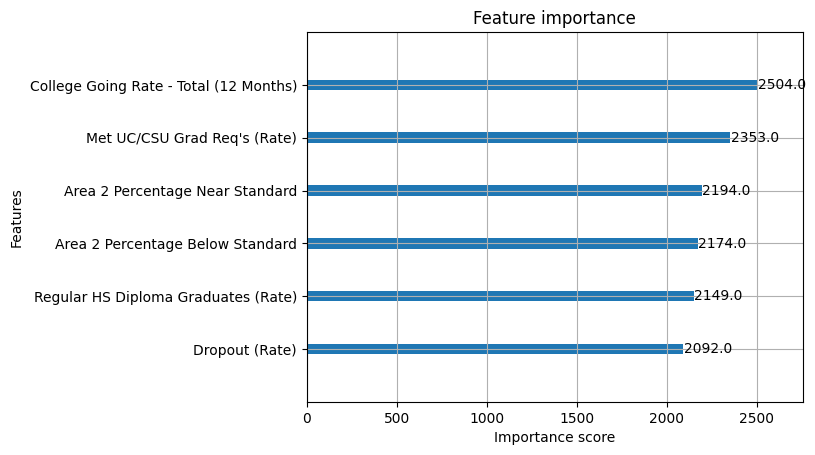

In [ ]:
xgboost.plot_importance(xgb2)
# this plots based on weight of each feature - meaning the amount of times the feature is used to split the tree

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

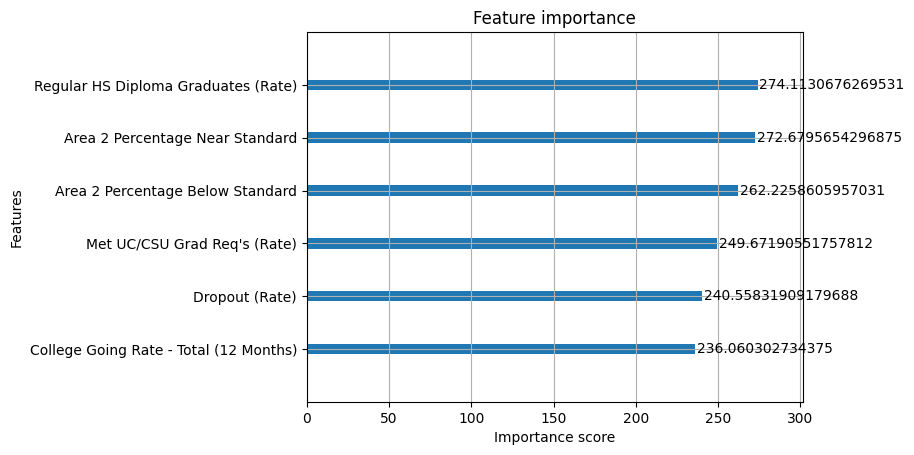

In [ ]:
xgboost.plot_importance(xgb2, importance_type="cover")
# cover is the amount of splits weighted by the amount of times a training point goes through the split

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

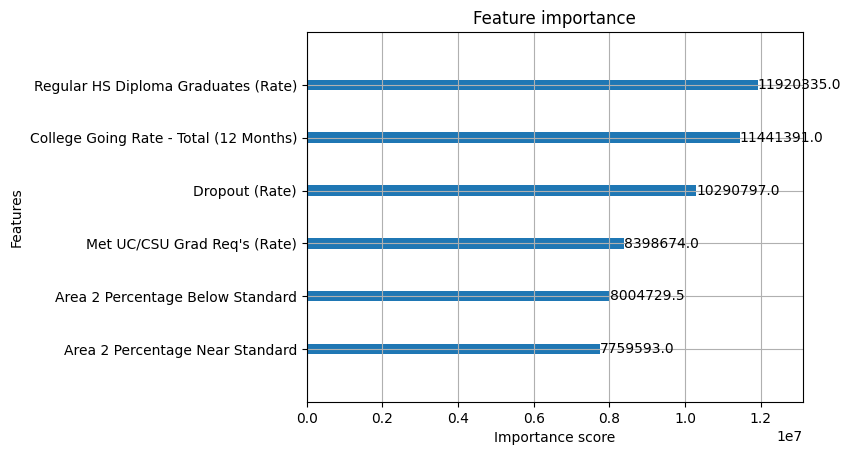

In [ ]:
xgboost.plot_importance(xgb2, importance_type="gain")
# gain measures the avg training loss decrease when using a feature to split a tree

In [ ]:
booster = xgb2.get_booster()
imps_weight = booster.get_score(importance_type="weight")
imps_weight = sorted(imps_weight.items(), key=lambda x: x[1], reverse=True)

imps_cover = booster.get_score(importance_type="cover")
imps_cover = sorted(imps_cover.items(), key=lambda x: x[1], reverse=True)

imps_gain = booster.get_score(importance_type="gain")
imps_gain = sorted(imps_gain.items(), key=lambda x: x[1], reverse=True)

print(imps_weight)
print(imps_cover)
print(imps_gain)

[('College Going Rate - Total (12 Months)', 2504.0), ("Met UC/CSU Grad Req's (Rate)", 2353.0), ('Area 2 Percentage Near Standard', 2194.0), ('Area 2 Percentage Below Standard', 2174.0), ('Regular HS Diploma Graduates (Rate)', 2149.0), ('Dropout (Rate)', 2092.0)]
[('Regular HS Diploma Graduates (Rate)', 274.1130676269531), ('Area 2 Percentage Near Standard', 272.6795654296875), ('Area 2 Percentage Below Standard', 262.2258605957031), ("Met UC/CSU Grad Req's (Rate)", 249.67190551757812), ('Dropout (Rate)', 240.55831909179688), ('College Going Rate - Total (12 Months)', 236.060302734375)]
[('Regular HS Diploma Graduates (Rate)', 11920335.0), ('College Going Rate - Total (12 Months)', 11441391.0), ('Dropout (Rate)', 10290797.0), ("Met UC/CSU Grad Req's (Rate)", 8398674.0), ('Area 2 Percentage Below Standard', 8004729.5), ('Area 2 Percentage Near Standard', 7759593.0)]


In [ ]:
print(shap_values.shape)
print(X_test.shape)

(180, 6)
(180, 10)


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], X_test[weight_feature_keep].iloc[i])

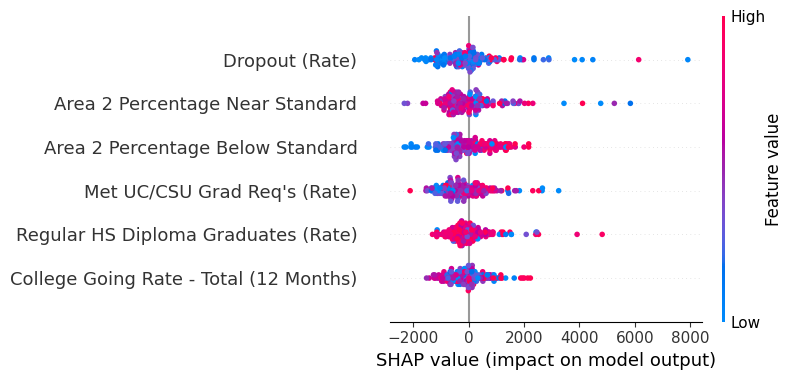

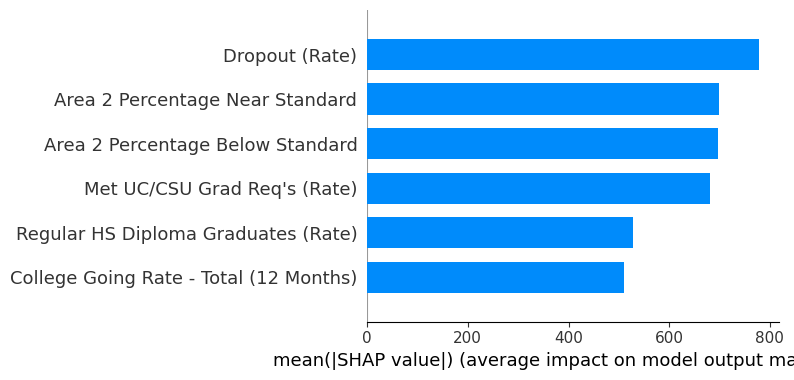

In [ ]:
shap.summary_plot(shap_values, X_test[weight_feature_keep])
shap.summary_plot(shap_values, X_test[weight_feature_keep], plot_type="bar")